The <b>mean squared error</b> has increased. So this shows that a single feature is not a good predictor of housing prices.

** To-Do 1: Make a train-test split and calculate the mean squared error for training data and test data.**

** To-Do 2: Plot the residuals for training and test datasets**

**In the next section, we are going to read in a feather file and assemble the dataset in one Pandas dataframe that 
we can work with.**
Refer to the "explore_questionnaire.pdf" in the folder for detailed explanation of the dataset.

<img src="./w56.png"/>

To install and run feather use:

**pip install feather-format** -- or else, (if you get import error) **pip install feather-format**

In [1]:
import feather
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

# Read feather frames to individual variables

anp_df = feather.read_dataframe('data_science_case/anp.feather')
face_df = feather.read_dataframe('data_science_case/face.feather')
image_df = feather.read_dataframe('data_science_case/image_data.feather')
metrics_df = feather.read_dataframe('data_science_case/image_metrics.feather')
object_labels_df = feather.read_dataframe('data_science_case/object_labels.feather')
survey_df = feather.read_dataframe('data_science_case/survey.feather')

# Exploratory 

## Investigate ANP matrix:

In [2]:
anp_df.head()

,image_id,anp_label,anp_sentiment,emotion_score,emotion_label
0,951727030670259635_143763900,hot_boys,0.017,0.1760,amazement
1,951727030670259635_143763900,young_couple,0.019,0.2113,joy
2,951727030670259635_143763900,dirty_laundry,-0.263,0.0929,joy
3,951727030670259635_143763900,global_mall,-0.031,0.1304,interest
4,951728575726873168_289794729,high_boots,0.025,0.1394,amazement


In [6]:
print anp_df.emotion_label.unique()

[u'amazement' u'joy' u'interest' u'sadness' u'anger' u'terror' u'serenity'
 u'fear' u'trust' u'surprise' u'grief' u'rage' u'boredom' u'ecstasy'
 u'annoyance' u'disgust' u'pensiveness' u'acceptance' u'distraction'
 u'anticipation' u'vigilance' u'loathing' u'apprehension' u'admiration']


In [7]:
anp_df.describe()

,anp_sentiment,emotion_score
count,325941.000000,325941.000000
mean,0.064778,0.162398
std,0.396601,0.070143
min,-2.363000,0.041700
25%,-0.068000,0.114800
50%,0.010000,0.146200
75%,0.158000,0.194900
max,2.160000,0.734700


Basically, each image is assigned a label (ex. hot_boys, young_couple, dirty_laundry) and each label has a certain emotion label (ex. Joy, vigilance, interest etc) along with a score (emotion_score) which corresponds to what is the percentage of "joy" in the "dirty laundry" label

In [9]:
# print the first 10 anp_labels and their connections to the emotion_labels and their scores
# (each anp_label is connected with ONLY 1 emotion (to minimize size of dataset) and has a score related to the emotion)
for anp_label in anp_df['anp_label'].unique()[:10]:
    print 'Images labeled with the ',anp_label, 'tag: show',anp_df[(anp_df.anp_label==anp_label)].emotion_score.unique()[0],anp_df[(anp_df.anp_label==anp_label)].emotion_label.unique()[0]

Images labeled with the  hot_boys tag: show 0.176 amazement
Images labeled with the  young_couple tag: show 0.2113 joy
Images labeled with the  dirty_laundry tag: show 0.0929 joy
Images labeled with the  global_mall tag: show 0.1304 interest
Images labeled with the  high_boots tag: show 0.1394 amazement
Images labeled with the  funny_pets tag: show 0.1924 joy
Images labeled with the  slow_motion tag: show 0.1141 interest
Images labeled with the  funny_dog tag: show 0.2859 joy
Images labeled with the  working_group tag: show 0.1234 amazement
Images labeled with the  old_friends tag: show 0.127 joy


In [10]:
#verify that each ANP label has the same emotion labels and scores across all images
anp_df[(anp_df.emotion_label=='joy') & (anp_df.anp_label=='young_couple')][:3]

,image_id,anp_label,anp_sentiment,emotion_score,emotion_label
1,951727030670259635_143763900,young_couple,0.019,0.2113,joy
1016,956837953127354719_6734387,young_couple,0.019,0.2113,joy
1679,961014334304796262_143854846,young_couple,0.019,0.2113,joy


In [12]:
#plot some of the lowest emotion scores
anp_df[anp_df.emotion_score == anp_df.emotion_score.min()][::50]
#aparently no one gives a shit about flat lakes, snowy plovers or gold_bridges

,image_id,anp_label,anp_sentiment,emotion_score,emotion_label
9612,581742959299903837_21697543,flat_lake,-0.036,0.0417,interest
44932,844465605783354211_187539125,snowy_plover,0.013,0.0417,vigilance
103220,472461365156868908_25469443,snowy_plover,0.013,0.0417,anger
125497,640658853911311267_55281515,flat_lake,-0.036,0.0417,boredom
158622,888102345472019372_11520833,snowy_plover,0.013,0.0417,loathing
195058,1347305921630342109_619868570,snowy_plover,0.013,0.0417,sadness
206081,1396432770201223841_3807589911,snowy_plover,0.013,0.0417,distraction
261877,472461365156868908_25469443,snowy_plover,0.013,0.0417,amazement
278568,1016105401709793550_6734387,gold_bridge,-0.004,0.0417,fear
313835,1212399656613744758_6734387,gold_bridge,-0.004,0.0417,acceptance


In [15]:
#Whats the ANP label with the most highly correlated emotion?
anp_df[anp_df.emotion_score == anp_df.emotion_score.max()]

,image_id,anp_label,anp_sentiment,emotion_score,emotion_label
42212,821358342425467127_31736205,junior_team,-0.104,0.7347,joy
150859,821358342425467127_31736205,junior_team,-0.104,0.7347,joy


## move to the rest of the feathers

In [4]:
face_df.head()

,image_id,face_id,face_gender,face_gender_confidence,face_age_range_high,face_age_range_low,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence
0,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,SAD,12.660271
1,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,CALM,8.252973
2,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,SURPRISED,24.634266
3,1003944279371027183_703978203,68.0,Male,99.927521,77.0,57.0,False,False,99.981598,False,99.993256,False,84.395294,True,99.420914,HAPPY,53.603287
4,1003944279371027183_703978203,68.0,Male,99.927521,77.0,57.0,False,False,99.981598,False,99.993256,False,84.395294,True,99.420914,SAD,5.509090


In [4]:
image_df.head()

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,user_full_name,user_name,user_website,user_profile_pic,user_bio,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,Leah Jenkins,leah.chelle,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0
1,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
2,594552614686078174_263042348,https://www.instagram.com/p/hARnP2pLTe/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Vesper,1385096216,22-11-2013 04:56:56,0.672679,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
3,553884883234370621_263042348,https://www.instagram.com/p/evy13fpLQ9/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1380248245,27-09-2013 02:17:25,0.843525,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
4,725551583154452417_263042348,https://www.instagram.com/p/oRrVIcJLfB/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1400712510,21-05-2014 22:48:30,0.859796,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0


In [5]:
metrics_df.head()

,image_id,comment_count,comment_count_time_created,like_count,like_count_time_created
0,1337283311810249709_3041716852,0.0,19-06-2017 19:33:26,15.0,19-06-2017 19:23:26
1,1337283311810249709_3041716852,0.0,19-06-2017 19:23:26,15.0,19-06-2017 19:23:26
2,1337834353379743556_3041716852,0.0,19-06-2017 19:33:26,23.0,19-06-2017 19:23:26
3,1337834353379743556_3041716852,0.0,19-06-2017 19:23:26,23.0,19-06-2017 19:23:26
4,1516356155708878303_3041716852,5.0,19-06-2017 19:23:07,19.0,19-06-2017 19:23:07


In [6]:
object_labels_df.head()

,image_id,data_amz_label,data_amz_label_confidence
0,863479386465416946_545497348,Animal,90.163101
1,916939688871507178_545497348,Animal,83.518669
2,551681403589539797_545497348,Animal,74.837212
3,1189285646274180856_545497348,Animal,76.920967
4,962361211517974133_545497348,Animal,71.223869


In [7]:
survey_df.head()

,id,gender,born,education,employed,income,A_2,N_1,P_1,E_1,...,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,private_account
0,920bf027f7d13dbdc7b66b3d3324903c,Male,1975,College graduate,Employed for wages,"$30,000 to $39,999",4,5,5,3,...,5,3.0,6.0,6.0,4.0,5,5.0,5,465.0,public
1,b433b2bfe49e28d0b7c45925b53084e0,Male,1978,College graduate,Employed for wages,"$20,000 to $29,999",8,0,9,7,...,9,7.0,9.0,8.0,7.0,9,0.0,9,6.0,public
2,4becd8768d42ffa6ef0a17d827f230a2,Male,1980,High school graduate,Self-employed,"$40,000 to $49,999",7,7,6,9,...,6,9.0,6.0,6.0,8.0,6,7.0,6,NaN,private
3,01d90eeb34866d03c52925738da7865f,Male,1959,College graduate,Employed for wages,"$10,000 to $19,999",6,4,1,5,...,1,5.0,3.0,3.0,3.0,1,4.0,1,NaN,private
4,f4f54676f75f47c17dc434cf68845328,Female,1990,High school graduate,Employed for wages,"$80,000 to $89,999",7,3,8,7,...,8,7.0,8.0,8.0,7.0,8,3.0,8,767.0,public


In [8]:
print survey_df['start_q'].max()
print survey_df['start_q'].min()
print survey_df['end_q'].max()
print survey_df['end_q'].min()


2017-03-23 15:11:19
2016-12-05 14:01:21
2017-03-23 15:16:17
2016-12-05 14:02:52


# Some preprocessing before merging

In [9]:
#Drop unnecessary columns in image_df dataframework
image_df.head()
drop = ['image_link','image_url','image_posted_time_unix','user_full_name',\
        'user_name','user_website','user_profile_pic','user_bio']

image_df =  image_df.drop(drop,axis=1)
image_df.head()

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,640.0,640.0,Lo-fi,14-08-2016 22:37:11,0.800521,3468175004,7.0,0.0,1.0
1,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0
2,594552614686078174_263042348,640.0,640.0,Vesper,22-11-2013 04:56:56,0.672679,263042348,316.0,347.0,73.0
3,553884883234370621_263042348,640.0,640.0,Amaro,27-09-2013 02:17:25,0.843525,263042348,316.0,347.0,73.0
4,725551583154452417_263042348,640.0,640.0,Amaro,21-05-2014 22:48:30,0.859796,263042348,316.0,347.0,73.0


In [10]:
#Drop unnecessary columns in metrics_df dataframework
metrics_df.head()
drop = ['comment_count_time_created','like_count_time_created']
metrics_df =  metrics_df.drop(drop,axis=1)
metrics_df.head()

,image_id,comment_count,like_count
0,1337283311810249709_3041716852,0.0,15.0
1,1337283311810249709_3041716852,0.0,15.0
2,1337834353379743556_3041716852,0.0,23.0
3,1337834353379743556_3041716852,0.0,23.0
4,1516356155708878303_3041716852,5.0,19.0


In [11]:
#Drop unnecessary columns in survey_df dataframework---MIGHT NEED MORE  COLUMNS!!!
print 'The survey started at: '+str(survey_df['start_q'].min())
print 'The survey ended at: '+str(survey_df['end_q'].max())+'\n\n'
drop = ['participate','completed','start_q','end_q','network_id','private_account']
survey_df =  survey_df.drop(drop,axis=1)
survey_df.head()

The survey started at: 2016-12-05 14:01:21
The survey ended at: 2017-03-23 15:16:17




,id,gender,born,education,employed,income,A_2,N_1,P_1,E_1,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
0,920bf027f7d13dbdc7b66b3d3324903c,Male,1975,College graduate,Employed for wages,"$30,000 to $39,999",4,5,5,3,...,6.198686e+08,5,3.0,6.0,6.0,4.0,5,5.0,5,465.0
1,b433b2bfe49e28d0b7c45925b53084e0,Male,1978,College graduate,Employed for wages,"$20,000 to $29,999",8,0,9,7,...,1.879203e+08,9,7.0,9.0,8.0,7.0,9,0.0,9,6.0
2,4becd8768d42ffa6ef0a17d827f230a2,Male,1980,High school graduate,Self-employed,"$40,000 to $49,999",7,7,6,9,...,5.133243e+08,6,9.0,6.0,6.0,8.0,6,7.0,6,NaN
3,01d90eeb34866d03c52925738da7865f,Male,1959,College graduate,Employed for wages,"$10,000 to $19,999",6,4,1,5,...,3.437021e+09,1,5.0,3.0,3.0,3.0,1,4.0,1,NaN
4,f4f54676f75f47c17dc434cf68845328,Female,1990,High school graduate,Employed for wages,"$80,000 to $89,999",7,3,8,7,...,3.342091e+07,8,7.0,8.0,8.0,7.0,8,3.0,8,767.0


# Merging of the Image elements

In [12]:
# Merge them based on the image_id so that we have a large data frame containing all the elements

image_anp_frame = pd.merge(image_df, anp_df, how='inner', on='image_id')
im_anp_obj_frame = pd.merge(image_anp_frame, object_labels_df, how='inner', on='image_id')
im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')


In [13]:
im_anp_obj_face_frame.shape

(3887625, 32)

In [14]:
im_anp_obj_face_frame.head()

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence
0,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
1,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015
2,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SURPRISED,11.01824
3,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
4,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015


In [15]:
print 'The number of unique users who took the Survey is: '+str(len(survey_df['insta_user_id'].unique()))
print 'The number of unique users in  the image data-set is: '+str(len(im_anp_obj_face_frame['user_id'].unique()))

The number of unique users who took the Survey is: 329
The number of unique users in  the image data-set is: 144


It seems that there is a conflict between the <b>'user-id'</b> in the <b>im_anp_obj_face_frame</b> dataframe and the <b>'insta_user_id'</b> in the <b>survey_df</b> dateframe. This conflict exists because the two columns are from different format (one is a string and the other a float). In  order to be able to merge them we need to convert the string values to  float.

In [16]:
im_anp_obj_face_frame['user_id'] = im_anp_obj_face_frame['user_id'].apply(lambda x : float(x))

In [17]:
import datetime

#convert all the image_posted_time strings to datime object for tracking the year of creation 
im_anp_obj_face_frame['image_posted_time'] = im_anp_obj_face_frame['image_posted_time'].apply(lambda x : datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S'))

In [18]:
#keeps only the last two year images of the users
years = ['2016','2017']
last_years = im_anp_obj_face_frame['image_posted_time'].apply(lambda x : True if str(x.year) in years else False)
last_years_images = im_anp_obj_face_frame[last_years.values]
print 'The last year dataframe has '+ str(len(last_years_images['user_id'].unique()))+' users.'

The last year dataframe has 127 users.


In [19]:
#merge the image dataframe with the survey dataframe 
image_survey = pd.merge(last_years_images,survey_df,left_on='user_id',right_on = 'insta_user_id')
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(1078350, 71)
The merging dataframe has 127 users.


# Further Pre-Processing

Because there are some missing values (NaN)  in the of the explanatory variables of the merging dataframework we need to further pre process our data by excluding the rows that have NaN values.

In [20]:
image_survey = image_survey.dropna()
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(1075410, 71)
The merging dataframe has 126 users.


In [21]:
#drop duplicates
image_survey = image_survey.drop_duplicates()
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(959613, 71)
The merging dataframe has 126 users.


In [22]:
image_survey.sample(5)

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
558116,1337209400372743395_452851338,640.0,640.0,Crema,2016-09-11 21:03:24,0.858680,452851338.0,287.0,611.0,1207.0,...,452851338.0,6,8.0,9.0,7.0,6.0,6,7.0,6,1199.0
723211,1214696139100016764_249861555,800.0,640.0,Normal,2016-03-26 20:11:25,0.847173,249861555.0,445.0,5154.0,691.0,...,249861555.0,6,7.0,5.0,7.0,6.0,6,9.0,6,689.0
622632,1395050323408440592_289794729,640.0,640.0,Normal,2016-11-30 16:22:59,0.862183,289794729.0,598.0,398.0,820.0,...,289794729.0,6,6.0,7.0,7.0,6.0,6,8.0,6,815.0
61796,1174244109242684680_4185084,480.0,640.0,Clarendon,2016-01-31 00:40:27,0.792365,4185084.0,24.0,65.0,64.0,...,4185084.0,6,6.0,9.0,5.0,8.0,6,8.0,6,64.0
666162,1153100990992152059_143763900,640.0,640.0,Nashville,2016-01-01 20:32:51,0.860114,143763900.0,456.0,190.0,772.0,...,143763900.0,8,9.0,6.0,8.0,6.0,8,5.0,8,771.0


In [23]:
image_survey.ix[:,:10].sample(5)

/home/aris/anaconda2/envs/tweets_USA/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos
1007715,1246728143069336360_1976682131,640.0,640.0,Normal,2016-05-10 00:53:17,0.877457,1.976682e+09,4240.0,4047.0,146.0
119141,1515271986275094785_34069800,640.0,640.0,Clarendon,2017-05-15 13:21:58,0.805209,3.406980e+07,456.0,455.0,757.0
98062,1295692327142983059_34069800,799.0,640.0,Skyline,2016-07-16 14:16:23,0.816486,3.406980e+07,456.0,455.0,757.0
1017290,1368553148356860114_190011156,640.0,640.0,Normal,2016-10-25 02:57:50,0.870529,1.900112e+08,548.0,422.0,371.0
247398,1465419614564885737_3988856,640.0,640.0,Normal,2017-03-07 18:34:12,0.756564,3.988856e+06,732.0,943.0,610.0


# Correlation Coefficients

In [24]:
# Calculate the correlation coefficients. Notice how the main diagonal is 1.00

correlation_matrix = im_anp_obj_face_frame.corr()
correlation_matrix

,image_height,image_width,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,...,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,emo_confidence
image_height,1.000000,0.367477,0.092194,-0.032317,-0.044179,-0.110193,0.056780,0.015892,0.006732,0.014332,...,0.000161,-0.010690,0.010262,-0.007228,0.008502,0.000130,0.008904,0.004826,0.016588,-0.000509
image_width,0.367477,1.000000,-0.048363,0.024987,0.032737,-0.051495,0.062664,-0.008777,-0.003462,0.000225,...,0.001980,0.027605,-0.015589,0.031723,-0.013112,-0.018547,-0.009949,0.008953,0.003785,-0.004968
data_memorability,0.092194,-0.048363,1.000000,-0.028486,-0.010293,-0.046380,-0.067173,0.106849,0.055681,0.032926,...,-0.032094,-0.063643,0.047527,-0.037170,0.044731,0.052936,0.044846,-0.033755,0.083209,-0.003185
user_id,-0.032317,0.024987,-0.028486,1.000000,0.010289,0.067582,-0.166396,-0.014089,-0.012419,-0.003699,...,0.021957,0.033926,-0.049911,0.039764,-0.052432,-0.041536,-0.065157,0.014768,-0.028688,-0.016735
user_followed_by,-0.044179,0.032737,-0.010293,0.010289,1.000000,0.300155,0.150294,-0.011532,0.002684,0.006521,...,-0.011087,0.043988,-0.028013,0.046854,-0.025272,-0.082719,-0.052183,-0.024712,-0.008538,-0.013778
user_follows,-0.110193,-0.051495,-0.046380,0.067582,0.300155,1.000000,0.040369,-0.017019,0.003237,-0.003662,...,0.013937,0.004460,-0.005718,-0.005291,0.001897,0.007140,0.011807,0.010431,-0.003827,0.005050
user_posted_photos,0.056780,0.062664,-0.067173,-0.166396,0.150294,0.040369,1.000000,-0.054813,-0.050928,-0.002424,...,0.018212,0.061977,-0.010526,0.064271,-0.019818,-0.064448,-0.019717,0.083662,-0.024243,-0.005419
anp_sentiment,0.015892,-0.008777,0.106849,-0.014089,-0.011532,-0.017019,-0.054813,1.000000,0.339011,0.005725,...,-0.029941,-0.031011,0.020933,-0.023893,0.019850,0.042821,0.030767,-0.042127,0.017479,0.004419
emotion_score,0.006732,-0.003462,0.055681,-0.012419,0.002684,0.003237,-0.050928,0.339011,1.000000,0.008191,...,-0.007838,-0.029593,0.021920,-0.027413,0.023165,0.039717,0.029398,-0.019903,0.015404,0.006878
data_amz_label_confidence,0.014332,0.000225,0.032926,-0.003699,0.006521,-0.003662,-0.002424,0.005725,0.008191,1.000000,...,-0.002400,0.000109,-0.003093,-0.004050,0.001187,0.002615,-0.001492,-0.004318,0.007987,-0.001657


** To-Do 3: Plot the correlation matrix with color codes corresponding to the how much two attributes are correlated. **

** To-Do 4: Calculate the Spearman rank for the attributes. **

### ASSIGNMENT

In this notebook we learned how to train and test a regressor on numerical data. For this assignment you are required to do the following:

1. Split the data into training and testing splits
2. Train a regressor to predict the PERMA scores on the test set using different sets of attributes (not all of them at once)
3. Analyze which features (attributes) correlate well with each other and help in fitting the curve to the data better.
4. Elaborate on the results.

In [25]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# TO-DO:3


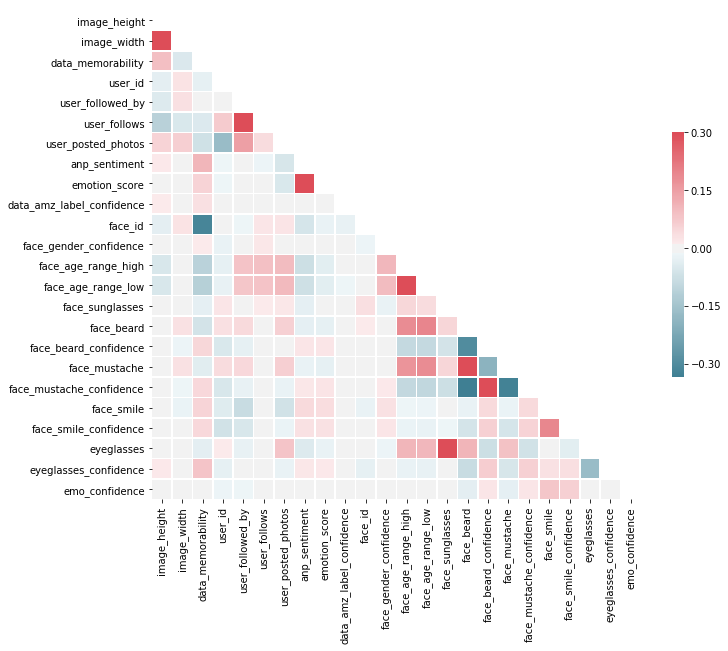

In [26]:

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
# Calculate the correlation coefficients. Notice how the main diagonal is 1.00

correlation_matrix_survey = image_survey.corr()
correlation_matrix_survey

,image_height,image_width,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
image_height,1.000000,0.299957,0.178676,-0.068997,-0.072937,-0.130637,0.077193,0.038639,0.007536,0.022934,...,-0.068997,-0.008879,-0.027690,0.019410,-0.026286,-0.077745,-0.008879,0.043111,-0.008879,0.086962
image_width,0.299957,1.000000,-0.038011,-0.081775,0.007598,-0.079643,0.058725,0.009579,0.000686,-0.002985,...,-0.081775,0.067967,0.053371,0.040437,0.023357,-0.008963,0.067967,-0.059756,0.067967,0.064722
data_memorability,0.178676,-0.038011,1.000000,-0.028846,-0.047657,-0.064537,-0.076701,0.126040,0.048235,0.033290,...,-0.028846,0.047993,-0.005391,-0.012027,-0.005111,-0.013987,0.047993,0.047271,0.047993,-0.067091
user_id,-0.068997,-0.081775,-0.028846,1.000000,-0.021143,0.034762,-0.223573,-0.026086,-0.012299,-0.005553,...,1.000000,-0.043354,0.000667,-0.028795,-0.071459,0.151668,-0.043354,0.060569,-0.043354,-0.306860
user_followed_by,-0.072937,0.007598,-0.047657,-0.021143,1.000000,0.274273,0.246046,-0.026595,-0.013304,0.015958,...,-0.021143,-0.018183,0.132251,-0.080279,-0.129923,-0.003901,-0.018183,-0.122000,-0.018183,0.176494
user_follows,-0.130637,-0.079643,-0.064537,0.034762,0.274273,1.000000,-0.045205,-0.024299,0.008858,0.003534,...,0.034762,-0.197094,0.128187,-0.209968,-0.022852,0.005729,-0.197094,0.196877,-0.197094,-0.033825
user_posted_photos,0.077193,0.058725,-0.076701,-0.223573,0.246046,-0.045205,1.000000,-0.085939,-0.088758,-0.002490,...,-0.223573,-0.031983,-0.146573,-0.365847,-0.289542,-0.106916,-0.031983,-0.225640,-0.031983,0.937194
anp_sentiment,0.038639,0.009579,0.126040,-0.026086,-0.026595,-0.024299,-0.085939,1.000000,0.348381,0.006652,...,-0.026086,0.039852,0.036580,0.053287,0.058959,0.012172,0.039852,0.034782,0.039852,-0.082252
emotion_score,0.007536,0.000686,0.048235,-0.012299,-0.013304,0.008858,-0.088758,0.348381,1.000000,0.004480,...,-0.012299,0.023706,0.034290,0.040626,0.048139,0.013733,0.023706,0.029542,0.023706,-0.086952
data_amz_label_confidence,0.022934,-0.002985,0.033290,-0.005553,0.015958,0.003534,-0.002490,0.006652,0.004480,1.000000,...,-0.005553,-0.003127,0.007613,0.007434,0.008358,-0.004161,-0.003127,0.013025,-0.003127,-0.000891


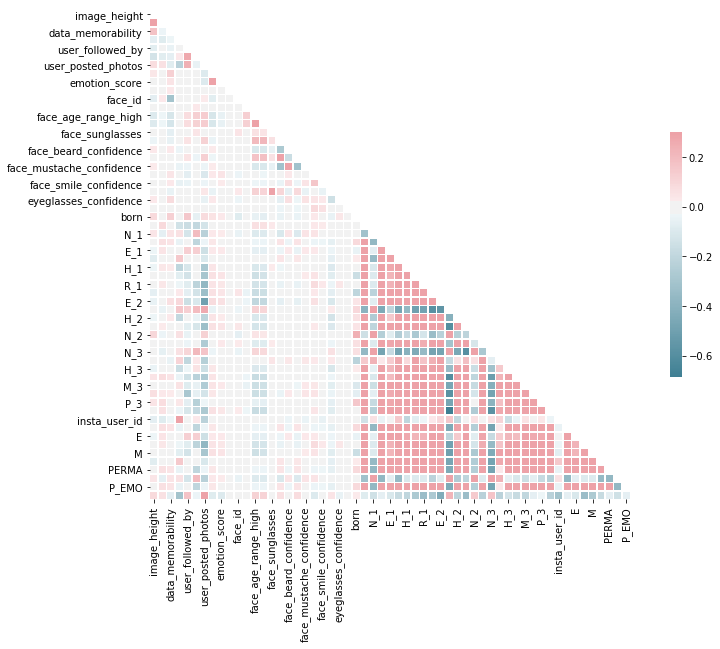

In [28]:
mask = np.zeros_like(correlation_matrix_survey, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_survey, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Linear Regression

# TO-DO:1

In [29]:
from sklearn.cross_validation import train_test_split

independent_variables = image_survey[list(correlation_matrix)]
dependent_variables = image_survey['PERMA']

x_train, x_test,  y_train, y_test = train_test_split(independent_variables,dependent_variables,test_size=0.2)


/home/aris/anaconda2/envs/tweets_USA/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
print x_train.shape
print x_test.shape

print y_train.shape
print y_test.shape

(767690, 24)
(191923, 24)
(767690,)
(191923,)


# TO-DO:2 

In [31]:
from sklearn.linear_model import LinearRegression
import time

start = time.time()
#This creates a LinearRegression object
lm = LinearRegression()
# Train the model using the training sets
lm.fit(x_train, y_train)

end = time.time()
print(end - start)


1.55041599274


In [32]:
# Make predictions using the testing set
insta_y_pred = lm.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, insta_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, insta_y_pred))

('Coefficients: \n', array([ -8.03929714e-04,   3.16016417e-03,   1.30422721e+00,
        -9.59241243e-11,   1.20620137e-04,  -2.59516838e-04,
        -1.22801988e-04,   8.35387058e-02,   2.76305022e-01,
        -5.52487470e-04,   8.65396279e-05,   3.14705640e-03,
         6.55743178e-03,  -1.13735233e-02,   2.09029070e-01,
         1.63049180e-01,  -2.38212283e-03,   9.56554432e-02,
         2.92104580e-04,  -1.08935934e-01,  -2.74262467e-03,
        -2.59724914e-01,  -2.04654596e-03,  -4.68831276e-05]))
Mean squared error: 2.33
Variance score: 0.06


# Different linear library

In [34]:
import statsmodels.formula.api as smf

#REFERENCE---->http://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

columns =list(correlation_matrix)



In [35]:
value ='PERMA~'+ '+'.join(columns)

print value

PERMA~image_height+image_width+data_memorability+user_id+user_followed_by+user_follows+user_posted_photos+anp_sentiment+emotion_score+data_amz_label_confidence+face_id+face_gender_confidence+face_age_range_high+face_age_range_low+face_sunglasses+face_beard+face_beard_confidence+face_mustache+face_mustache_confidence+face_smile+face_smile_confidence+eyeglasses+eyeglasses_confidence+emo_confidence


In [36]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula=value, data=image_survey).fit()

# print the coefficients
lm1.params

Intercept                    4.619793e+00
face_sunglasses[T.True]      2.098372e-01
face_beard[T.True]           1.599166e-01
face_mustache[T.True]        9.477070e-02
face_smile[T.True]          -1.052601e-01
eyeglasses[T.True]          -2.589511e-01
image_height                -8.093429e-04
image_width                  3.168350e-03
data_memorability            1.294140e+00
user_id                     -9.701323e-11
user_followed_by             1.196619e-04
user_follows                -2.604123e-04
user_posted_photos          -1.232563e-04
anp_sentiment                8.510874e-02
emotion_score                2.633554e-01
data_amz_label_confidence   -6.346408e-04
face_id                      1.335011e-04
face_gender_confidence       3.001093e-03
face_age_range_high          7.083801e-03
face_age_range_low          -1.195665e-02
face_beard_confidence       -2.433809e-03
face_mustache_confidence     3.763830e-04
face_smile_confidence       -2.738089e-03
eyeglasses_confidence       -2.210

In [37]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2672.
Date:                Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:37:06   Log-Likelihood:            -1.7657e+06
No. Observations:              959613   AIC:                         3.532e+06
Df Residuals:                  959588   BIC:                         3.532e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.6198      0.056     82.096      0.000       4.510       4.730
face_sunglasses[T.True]       0.2098      0.006     37.437      0.000       0.199       0.221
face_beard[T.True]            0.1599      0.005     29.235      0.000       0.149       0.171
face_mustache[T.True]         0.0948      0.006     16.547      0.000       0.084       0.106
face_smile[T.True]           -0.1053      0.004    -29.476      0.000      -0.112      -0.098
eyeglasses[T.True]           -0.2590      0.004    -64.483      0.000      -0.267      -0.251
image_height                 -0.0008    1.5e-05    -53.910      0.000      -0.001      -0.001
image_width                   0.0032    4.8e-05     65.949      0.000       0.003       0.003
data_memorability             1.2941      0.031     41.360      0.000       1.233       1.355
user_id                   -9.701e-11   2.06e-12    -47.176      0.000   -1.01e-10    -9.3e-11
user_followed_by              0.0001   2.94e-06     40.703      0.000       0.000       0.000
user_follows                 -0.0003   1.34e-06   -194.173      0.000      -0.000      -0.000
user_posted_photos           -0.0001    2.1e-06    -58.658      0.000      -0.000      -0.000
anp_sentiment                 0.0851      0.004     21.358      0.000       0.077       0.093
emotion_score                 0.2634      0.023     11.226      0.000       0.217       0.309
data_amz_label_confidence    -0.0006      0.000     -3.773      0.000      -0.001      -0.000
face_id                       0.0001   4.94e-05      2.703      0.007    3.67e-05       0.000
face_gender_confidence        0.0030      0.000     10.451      0.000       0.002       0.004
face_age_range_high           0.0071      0.001     12.020      0.000       0.006       0.008
face_age_range_low           -0.0120      0.001    -14.436      0.000      -0.014      -0.010
face_beard_confidence        -0.0024      0.000    -16.070      0.000      -0.003      -0.002
face_mustache_confidence      0.0004      0.000      2.309      0.021    5.69e-05       0.001
face_smile_confidence        -0.0027      0.000    -24.219      0.000      -0.003      -0.003
eyeglasses_confidence        -0.0022      0.000    -13.988      0.000      -0.003      -0.002
emo_confidence            -5.925e-05   4.42e-05     -1.340      0.180      -0.000    2.74e-05
==============================================================================
Omnibus:                    21562.077   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31174.245
Skew:                          -0.254   Prob(JB):                         0.00
Kurtosis:                       3.722   Cond. No.                     3.63e+10
========================================================

In [38]:
# calculate r-square 
lm1.rsquared

0.062653358460017516

In [39]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,4.509500e+00,4.730086e+00
face_sunglasses[T.True],1.988513e-01,2.208231e-01
face_beard[T.True],1.491956e-01,1.706375e-01
face_mustache[T.True],8.354542e-02,1.059960e-01
face_smile[T.True],-1.122592e-01,-9.826097e-02
eyeglasses[T.True],-2.668219e-01,-2.510802e-01
image_height,-8.387674e-04,-7.799185e-04
image_width,3.074188e-03,3.262512e-03
data_memorability,1.232813e+00,1.355466e+00
user_id,-1.010437e-10,-9.298274e-11


In [40]:
y_predict = lm1.predict(x_test)
y_predict.head()

15536     6.660925
564047    6.424601
750393    5.256219
897304    6.370330
658698    6.352829
dtype: float64

In [41]:
#sklearn predictions
insta_y_pred[:5]

array([ 6.65783859,  6.4232884 ,  5.25333233,  6.37141697,  6.3551497 ])

# Plot the residuals

In [42]:
residuals = y_test - insta_y_pred
residuals.head()

15536     0.342161
564047   -0.423288
750393    0.746668
897304    0.628583
658698    3.644850
Name: PERMA, dtype: float64

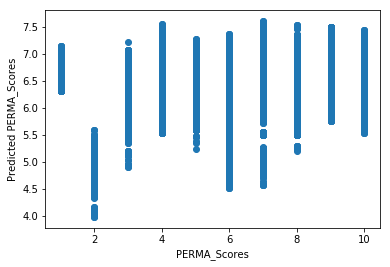

In [43]:
#PERMA Scores are from  1-10

plt.scatter(y_test, insta_y_pred)
plt.xlabel("PERMA_Scores")
plt.ylabel("Predicted PERMA_Scores")
plt.title("")
plt.show()

It is clear that the regression model doesnt give accurate predictions for all the variables at once.

# Start-Analysis

In [44]:
def subtrack_features(main_list, subtr_features):
    
    new = [item for item in main_list if item not in subtr_features]
    
    return new

def prepare_set_statmodel(features):
    
    return 'PERMA~'+ '+'.join(features)


def regression_stats(formula,data):
    # create a fitted model with all three features
    lm = smf.ols(formula= formula, data=data).fit()
    print lm.params
    return lm
    

In [45]:
#print len(columns)
unnecessary = ['face_age_range_high','face_age_range_low','face_mustache','face_beard','user_id','face_id']


features = subtrack_features(columns,unnecessary)
print "The number of features are: "+str(len(features))+'\n'

print prepare_set_statmodel(features)


The number of features are: 18

PERMA~image_height+image_width+data_memorability+user_followed_by+user_follows+user_posted_photos+anp_sentiment+emotion_score+data_amz_label_confidence+face_gender_confidence+face_sunglasses+face_beard_confidence+face_mustache_confidence+face_smile+face_smile_confidence+eyeglasses+eyeglasses_confidence+emo_confidence


In [46]:
metrics_df.head()

,image_id,comment_count,like_count
0,1337283311810249709_3041716852,0.0,15.0
1,1337283311810249709_3041716852,0.0,15.0
2,1337834353379743556_3041716852,0.0,23.0
3,1337834353379743556_3041716852,0.0,23.0
4,1516356155708878303_3041716852,5.0,19.0


In [47]:
##TRY ANOTHER ONE BY EXTRACTING SOME FEATURES
### STATSMODELS ###
lm_model = regression_stats(prepare_set_statmodel(features),image_survey)
lm_model.summary() 

Intercept                    4.639180
face_sunglasses[T.True]      0.217703
face_smile[T.True]          -0.095240
eyeglasses[T.True]          -0.250295
image_height                -0.000807
image_width                  0.003358
data_memorability            1.342343
user_followed_by             0.000122
user_follows                -0.000265
user_posted_photos          -0.000092
anp_sentiment                0.089379
emotion_score                0.285703
data_amz_label_confidence   -0.000594
face_gender_confidence       0.002962
face_beard_confidence       -0.003216
face_mustache_confidence    -0.001495
face_smile_confidence       -0.002522
eyeglasses_confidence       -0.002156
emo_confidence              -0.000094
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     3261.
Date:                Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:37:10   Log-Likelihood:            -1.7683e+06
No. Observations:              959613   AIC:                         3.537e+06
Df Residuals:                  959594   BIC:                         3.537e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.6392      0.054     85.218      0.000       4.532       4.746
face_sunglasses[T.True]       0.2177      0.006     38.803      0.000       0.207       0.229
face_smile[T.True]           -0.0952      0.004    -26.640      0.000      -0.102      -0.088
eyeglasses[T.True]           -0.2503      0.004    -62.592      0.000      -0.258      -0.242
image_height                 -0.0008    1.5e-05    -53.761      0.000      -0.001      -0.001
image_width                   0.0034    4.8e-05     69.894      0.000       0.003       0.003
data_memorability             1.3423      0.030     44.846      0.000       1.284       1.401
user_followed_by              0.0001   2.94e-06     41.299      0.000       0.000       0.000
user_follows                 -0.0003   1.33e-06   -198.620      0.000      -0.000      -0.000
user_posted_photos        -9.183e-05   2.03e-06    -45.301      0.000   -9.58e-05   -8.79e-05
anp_sentiment                 0.0894      0.004     22.475      0.000       0.082       0.097
emotion_score                 0.2857      0.024     12.150      0.000       0.240       0.332
data_amz_label_confidence    -0.0006      0.000     -3.522      0.000      -0.001      -0.000
face_gender_confidence        0.0030      0.000     10.380      0.000       0.002       0.004
face_beard_confidence        -0.0032      0.000    -21.554      0.000      -0.004      -0.003
face_mustache_confidence     -0.0015      0.000     -9.515      0.000      -0.002      -0.001
face_smile_confidence        -0.0025      0.000    -22.276      0.000      -0.003      -0.002
eyeglasses_confidence        -0.0022      0.000    -13.622      0.000      -0.002      -0.002
emo_confidence            -9.424e-05   4.43e-05     -2.127      0.033      -0.000    -7.4e-06
==============================================================================
Omnibus:                    20438.556   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27955.563
Skew:                          -0.261   Prob(JB):                         0.00
Kurtosis:                       3.654   Cond. No.                     6.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Average the data

In [48]:
#One solution for training is to average the data as the lecturer proposed
image_survey_avg = image_survey.groupby(['user_id']).mean()
print image_survey_avg.shape
#Megeimage_survey_avg.sample(5)

(126, 57)


In [49]:
#Merge Big dataframe to metrics

image_survey_metrics = pd.merge(image_survey, metrics_df, how='inner', on='image_id')
image_survey_metrics = image_survey_metrics.dropna()
print 'The number of unique users in dataframe is: '+str(len(image_survey_metrics['user_id'].unique()))

The number of unique users in dataframe is: 125


In [50]:
image_survey_metrics.sample(5)

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
552462,1326105366701874861_288335200,640.0,640.0,Normal,2016-08-27 13:21:40,0.848177,288335200.0,1077.0,481.0,678.0,...,7.0,8.0,7.0,7.0,7,3.0,7,674.0,4.0,54.0
98197,1517763630258368260_1619510,640.0,640.0,Normal,2017-05-18 23:52:25,0.871427,1619510.0,364.0,814.0,2037.0,...,7.0,4.0,5.0,4.0,4,2.0,4,1515.0,2.0,42.0
442351,1464258805164383141_650122500,640.0,640.0,Normal,2017-03-06 04:07:53,0.820718,650122500.0,133.0,191.0,398.0,...,1.0,8.0,4.0,1.0,3,8.0,3,393.0,0.0,12.0
224718,1367947654277859638_235671446,640.0,640.0,Clarendon,2016-10-24 06:54:49,0.724063,235671446.0,1318.0,936.0,2997.0,...,5.0,5.0,6.0,6.0,6,4.0,6,1545.0,1.0,58.0
12394,1194555953733960452_287562303,640.0,640.0,Sierra,2016-02-28 01:16:28,0.829307,287562303.0,456.0,373.0,156.0,...,8.0,8.0,6.0,5.0,7,9.0,7,156.0,4.0,50.0


In [51]:
image_survey_avg = image_survey_metrics.groupby(['user_id']).mean()
print image_survey_avg.shape

(125, 59)


In [52]:
#Add the features of the metrics to the main features list
features = list(correlation_matrix)
features.append(u'like_count')
features.append(u'comment_count')
features.remove(u'user_id')
#features+['like_count','comment_count
print features

[u'image_height', u'image_width', u'data_memorability', u'user_id', u'user_followed_by', u'user_follows', u'user_posted_photos', u'anp_sentiment', u'emotion_score', u'data_amz_label_confidence', u'face_id', u'face_gender_confidence', u'face_age_range_high', u'face_age_range_low', u'face_sunglasses', u'face_beard', u'face_beard_confidence', u'face_mustache', u'face_mustache_confidence', u'face_smile', u'face_smile_confidence', u'eyeglasses', u'eyeglasses_confidence', u'emo_confidence', u'like_count', u'comment_count']


In [61]:
##TRY ANOTHER ONE BY EXTRACTING SOME FEATURES
### STATSMODELS ###
#We are going to fit the average of the data of the users

lm2_model = regression_stats(prepare_set_statmodel(features),image_survey_avg)
lm2_model.summary() 

Intercept                     2.817151
image_height                 -0.001366
image_width                   0.011672
data_memorability             1.247408
user_followed_by              0.000553
user_follows                 -0.000312
user_posted_photos           -0.000540
anp_sentiment                 2.979799
emotion_score                14.118739
data_amz_label_confidence     0.045156
face_id                       0.008378
face_gender_confidence        0.024180
face_age_range_high          -0.086388
face_age_range_low            0.132905
face_sunglasses               1.650052
face_beard                    1.336479
face_beard_confidence        -0.016676
face_mustache                 0.916110
face_mustache_confidence     -0.003293
face_smile                    0.380921
face_smile_confidence        -0.032313
eyeglasses                   -1.109269
eyeglasses_confidence        -0.102079
emo_confidence                0.016072
like_count                   -0.005822
comment_count            

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.158
Date:                Mon, 16 Oct 2017   Prob (F-statistic):              0.298
Time:                        22:23:31   Log-Likelihood:                -232.30
No. Observations:                 125   AIC:                             516.6
Df Residuals:                      99   BIC:                             590.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.8172     21.336      0.132      0.895     -39.518      45.152
image_height                 -0.0014      0.004     -0.319      0.750      -0.010       0.007
image_width                   0.0117      0.009      1.267      0.208      -0.007       0.030
data_memorability             1.2474      6.932      0.180      0.858     -12.507      15.001
user_followed_by              0.0006      0.000      1.502      0.136      -0.000       0.001
user_follows                 -0.0003      0.000     -1.575      0.118      -0.001    8.12e-05
user_posted_photos           -0.0005      0.000     -1.465      0.146      -0.001       0.000
anp_sentiment                 2.9798      1.652      1.804      0.074      -0.297       6.257
emotion_score                14.1187     11.754      1.201      0.233      -9.204      37.441
data_amz_label_confidence     0.0452      0.068      0.662      0.509      -0.090       0.180
face_id                       0.0084      0.016      0.517      0.606      -0.024       0.041
face_gender_confidence        0.0242      0.183      0.132      0.895      -0.339       0.387
face_age_range_high          -0.0864      0.119     -0.728      0.468      -0.322       0.149
face_age_range_low            0.1329      0.169      0.786      0.434      -0.203       0.468
face_sunglasses               1.6501      1.331      1.239      0.218      -0.991       4.292
face_beard                    1.3365      2.393      0.558      0.578      -3.413       6.086
face_beard_confidence        -0.0167      0.042     -0.395      0.694      -0.100       0.067
face_mustache                 0.9161      2.437      0.376      0.708      -3.918       5.751
face_mustache_confidence     -0.0033      0.060     -0.055      0.956      -0.123       0.116
face_smile                    0.3809      0.990      0.385      0.701      -1.583       2.345
face_smile_confidence        -0.0323      0.036     -0.899      0.371      -0.104       0.039
eyeglasses                   -1.1093      0.941     -1.179      0.241      -2.976       0.758
eyeglasses_confidence        -0.1021      0.048     -2.118      0.037      -0.198      -0.006
emo_confidence                0.0161      0.055      0.291      0.772      -0.093       0.126
like_count                   -0.0058      0.006     -0.937      0.351      -0.018       0.007
comment_count                 0.1085      0.162      0.672      0.503      -0.212       0.429
==============================================================================
Omnibus:                        2.379   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                1.910
Skew:                          -0.180   Prob(JB):                        0.385
Kurtosis:                       3.487   C